In [74]:
import sys
sys.dont_write_bytecode = True

from pyprojroot import here
root=here(project_files=[".here"])
sys.path.append(str(root))

import h5py
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

import utils

# Raw plot_data.h5

In [64]:
plot_data_file = "../../test_sims/sim6/outputs/plot_data.h5"
f = h5py.File(plot_data_file, 'r')

In [75]:
# Scientific information
utils.lprint(list(f.keys()))

darcy_velocity.cell.0                   	darcy_velocity.cell.1                   	darcy_velocity.cell.2                   	
hydraulic_head.cell.0                   	mass_density_liquid.cell.0              	molar_density_liquid.cell.0             	
permeability.cell.0                     	permeability.cell.1                     	permeability.cell.2                     	
porosity.cell.0                         	pressure.cell.0                         	prev_saturation_liquid.cell.0           	
prev_water_content.cell.0               	saturation_liquid.cell.0                	total_component_concentration.cell.Tritium conc	


In [76]:
# Cycles
lprint(list(f['total_component_concentration.cell.Tritium conc'].keys()), ncols=5, col_width=10)

117       	120       	122       	123       	124       	
125       	126       	127       	128       	129       	
130       	131       	132       	133       	134       	
135       	136       	137       	138       	95ic      	


In [69]:
tritium_117 = f['total_component_concentration.cell.Tritium conc']['117']
tritium_95ic = f['total_component_concentration.cell.Tritium conc']['95ic']
# ic: the initial condition when you restart

np.array(tritium_117).shape

(1849039, 1)

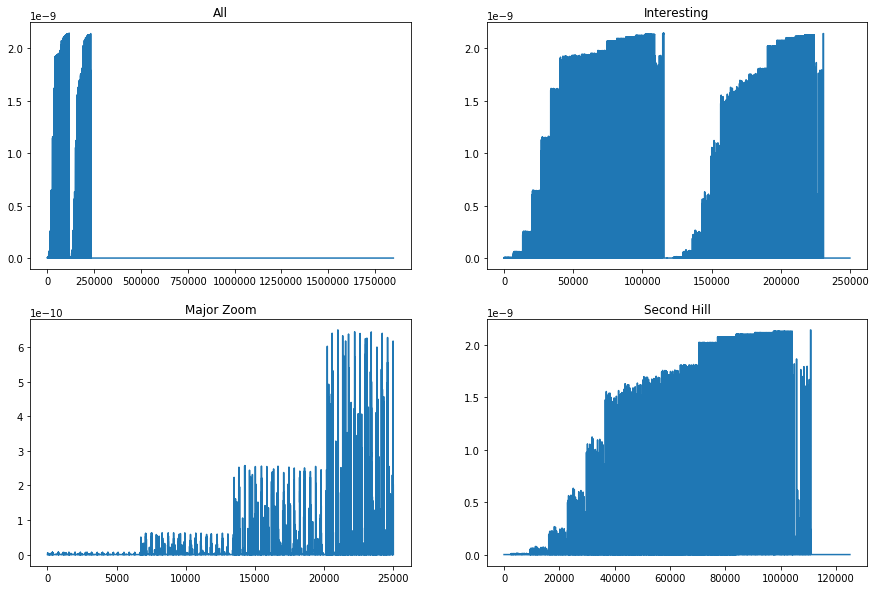

In [70]:
########################################
## Visualizing Tritium concentrations ##
########################################

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
ax[0,0].plot(tritium_117)
ax[0,0].set_title("All")

ax[0,1].plot(tritium_117[:250000])
ax[0,1].set_title("Interesting")

ax[1,0].plot(tritium_117[:25000])
ax[1,0].set_title("Major Zoom")

ax[1,1].plot(tritium_117[120000:245000])
ax[1,1].set_title("Second Hill")

plt.show()

---
# plot_mesh.h5

In [7]:
plot_data_file = "../../test_sims/sim6/outputs/plot_mesh.h5"
f_plot_mesh = h5py.File(plot_data_file, 'r')

In [77]:
for k in f_plot_mesh['95/Mesh']:
    print(f"{k: >15} => {f_plot_mesh['95/Mesh'][k].shape}")

     ElementMap => (1849039, 1)
  MixedElements => (12943273, 1)
        NodeMap => (982998, 1)
          Nodes => (982998, 3)


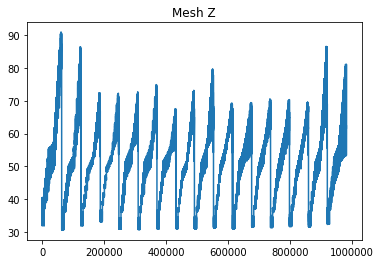

In [9]:
########################################
## Z-Axis in the XYZ Mesh coordinates ##
########################################

mesh_xyz = f_plot_mesh['95/Mesh/Nodes']

plt.figure("Mesh Z")
plt.plot(mesh_xyz[:,-1])
plt.title("Mesh Z")
plt.show()

---
# Exploring the variables


In [79]:
elementMap = f_plot_mesh['95/Mesh/ElementMap']
mixedElements = f_plot_mesh['95/Mesh/MixedElements']
nodeMap = f_plot_mesh['95/Mesh/NodeMap']
nodes = f_plot_mesh['95/Mesh/Nodes']

print(f"{'elementMap:':>20}", elementMap.shape)
print(f"{'mixedElements:':>20}", mixedElements.shape)
print(f"{'nodeMap:':>20}", nodeMap.shape)
print(f"{'nodes:':>20}", nodes.shape)

         elementMap: (1849039, 1)
      mixedElements: (12943273, 1)
            nodeMap: (982998, 1)
              nodes: (982998, 3)


In [81]:
12943273/1849039

7.0